- ## Escolha do modelo
- ## Treinamento do modelo
- ## Teste do modelo
- ## Armazenamento do modelo

In [1]:
# maximiza nro de linhas e colunas para exibição
# inibe mensagens de warning
import pandas as pd
pd.set_option('display.max_rows', None) # permite a máxima visualização das linhas em um display
pd.set_option('display.max_columns', None) # permite a máxima visualização das colunas em um display
import warnings
warnings.simplefilter('ignore') # inibe a exibição de avisos de warning
warnings.filterwarnings('ignore') # inibe a exibição de avisos de warning

In [2]:
# modelos de regressão
from sklearn.linear_model import LinearRegression # se ajusta a um modelo linear minimizando a soma dos quadrados residuais entre as previsões e os valores observados
from sklearn.linear_model import Lasso # modelo de regressão linear que utiliza a regularização L1 para estimar coeficientes esparsos, ajudando a evitar o overfitting
from sklearn.linear_model import ElasticNet # método de regressão regularizada que combina penalidades de Lasso (L1) e Ridge (L2) para melhorar a previsibilidade do modelo

from sklearn.tree import DecisionTreeRegressor # utilizam uma estrutura semelhante a uma árvore para classificar dados em categorias diferentes, permitindo decisões baseadas em características das entradas
from sklearn.neighbors import KNeighborsRegressor # modelo de regressão que utiliza os k-vizinhos mais próximos para prever o alvo
from sklearn.svm import SVR # (Suporte à Regressão Vetorial) é uma técnica de aprendizado de máquina utilizada para realizar regressões e pode lidar com kernels lineares e não-lineares

from sklearn.ensemble import RandomForestRegressor # estimador meta que ajusta uma série de regressões de árvores de decisão em subamostras do conjunto de dados e usa a média para melhorar a precisão das previsões
from sklearn.ensemble import GradientBoostingRegressor # estimador que constrói um modelo aditivo de forma progressiva e permite a otimização de funções de perda diferenciáveis
from sklearn.ensemble import ExtraTreesRegressor # método de aprendizado de conjunto para tarefas de regressão que constrói múltiplas árvores de decisão e média suas previsões para melhor desempenho
from sklearn.ensemble import AdaBoostRegressor # metamodelo que começa ajustando um regressor no conjunto de dados original e, em seguida, ajusta cópias adicionais do regressor em cópias ponderadas do conjunto de dados

from sklearn.neural_network import MLPRegressor # modelo de regressão que utiliza uma rede neural de múltiplas camadas para otimizar o erro quadrático

In [3]:
# análise de dados e avaliação dos modelos
from sklearn.model_selection import train_test_split # utilizada para dividir conjuntos de dados em subconjuntos de treino e teste, ajudando na validação de modelos
from sklearn.model_selection import KFold # técnica de validação cruzada que divide um conjunto de dados em 'k' subconjuntos (folds) para treinar e testar modelos, garantindo que cada exemplo seja usado para treinamento e teste
from sklearn.model_selection import cross_val_score # avalia o desempenho de um estimador usando validação cruzada. Ela divide os dados em k partes e treina o modelo k vezes

from sklearn.metrics import mean_squared_error # métrica de avaliação que mede a média dos erros quadráticos entre os valores previstos e os valores reais

In [4]:
# modelos de aprendizado profundo
from keras.models import Sequential # permite agrupar uma pilha linear de camadas em um modelo, facilitando a construção de redes neurais
from keras.layers import Dense # camada fundamental em redes neurais, onde cada neurônio está conectado a todos os neurônios da camada anterior, o que a torna amplamente utilizada em redes de múltiplas camadas
from keras.optimizers import SGD # otimizador usado em Keras que atualiza os parâmetros com base no gradiente e na taxa de aprendizado definida
from tensorflow.keras.optimizers import Adam # método de descida de gradiente estocástico que usa estimativas adaptativas de momentos de primeira e segunda ordem
from keras.layers import LSTM # camada de rede neural recorrente que é utilizada para modelar sequências temporais, capaz de aprender padrões de longo prazo em dados sequenciais

In [5]:
# modelos de séries temporais
from statsmodels.tsa.arima_model import ARIMA # modelo estatístico usado para análise de séries temporais
import statsmodels.api as sm # Modelo Estrutural é uma abordagem usada em estatística e econometria para modelar relações complexas entre variáveis

In [6]:
# preparação e visualização de dados
# pandas, pandas_datareader, numpy e matplotlib
import numpy as np # computaçaõ de matrizes
from matplotlib import pyplot # plotagem gráfica

In [7]:
# carregando arquivo tratado em dataframe
df_gold_trans = pd.read_csv('df_treated/df_gold_trans.csv')

In [8]:
# conferindo a dimensão do dataframe, linhas e colunas
df_gold_trans.shape

(1206, 41)

In [9]:
# ordenando pelo index o dataframe carregado
df_gold_trans = df_gold_trans.sort_index()

In [10]:
# reconhecendo as primeiras linhas do df
df_gold_trans.head(5)

,date,sp500 open,sp500 high,sp500 low,sp500 close,nasdaq open,nasdaq high,nasdaq low,nasdaq close,nasdaq high-low,usd_chf,silver open,silver high,silver low,silver close,silver volume,oil high-low,gold open,gold high,gold low,gold close,standard__sp500 open,standard__sp500 high,standard__sp500 low,standard__sp500 close,standard__nasdaq open,standard__nasdaq high,standard__nasdaq low,standard__nasdaq close,standard__nasdaq high-low,standard__usd_chf,standard__silver open,standard__silver high,standard__silver low,standard__silver close,standard__silver volume,standard__oil high-low,standard__gold open,standard__gold high,standard__gold low,standard__gold close
0,2010-04-01,117.80,118.25,117.10,117.80,48.34,48.70,47.79,48.16,0.91,1.0559,17.89,17.9500,17.790,17.84,96350.0,0.330,109.9700,110.4700,109.92,110.26,-2.771243,-2.778349,-2.766272,-2.770555,-2.207742,-2.205655,-2.211944,-2.211372,-0.456933,2.393095,0.373972,0.355181,0.377596,0.355303,0.079335,0.090875,-1.500334,-1.489406,-1.448056,-1.457262
1,2010-04-05,118.25,118.84,117.92,118.76,48.26,48.72,48.14,48.61,0.58,1.0619,17.95,18.1000,17.900,18.08,180524.0,0.670,110.5600,110.9837,110.27,110.89,-2.759359,-2.762784,-2.744630,-2.745236,-2.210116,-2.205064,-2.201534,-2.198044,-1.072927,2.547151,0.401619,0.423798,0.428713,0.466116,2.020602,2.264872,-1.413354,-1.413944,-1.396188,-1.364412
2,2010-04-12,119.70,120.05,119.56,119.74,49.05,49.20,48.94,49.07,0.26,1.0598,18.38,18.4600,18.110,18.12,102729.0,0.585,113.6400,114.1300,112.98,113.01,-2.721067,-2.730861,-2.701346,-2.719390,-2.186671,-2.190875,-2.177741,-2.184421,-1.670255,2.493231,0.599753,0.588479,0.526299,0.484584,0.226451,1.721372,-0.959291,-0.951758,-0.994587,-1.051965
3,2010-04-15,120.99,121.57,120.95,121.29,49.88,50.19,49.87,50.13,0.32,1.0595,18.32,18.4526,18.320,18.39,78015.0,0.460,112.9000,113.7100,112.85,113.65,-2.687000,-2.690760,-2.664660,-2.678511,-2.162039,-2.161612,-2.150082,-2.153027,-1.558256,2.485529,0.572106,0.585094,0.623885,0.609249,-0.343516,0.922109,-1.068384,-1.013456,-1.013852,-0.957641
4,2010-04-19,119.01,119.93,118.47,119.81,49.36,49.66,48.90,49.50,0.76,1.0650,17.60,17.7300,17.565,17.71,90447.0,0.440,110.8801,111.3600,110.67,111.15,-2.739289,-2.734027,-2.730114,-2.717544,-2.177471,-2.177278,-2.178931,-2.171686,-0.736930,2.626747,0.240347,0.254542,0.273040,0.295279,-0.056803,0.794227,-1.366164,-1.358666,-1.336911,-1.326093


In [11]:
# verificando a posição de cada variável
df_gold_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       1206 non-null   object 
 1   sp500 open                 1206 non-null   float64
 2   sp500 high                 1206 non-null   float64
 3   sp500 low                  1206 non-null   float64
 4   sp500 close                1206 non-null   float64
 5   nasdaq open                1206 non-null   float64
 6   nasdaq high                1206 non-null   float64
 7   nasdaq low                 1206 non-null   float64
 8   nasdaq close               1206 non-null   float64
 9   nasdaq high-low            1206 non-null   float64
 10  usd_chf                    1206 non-null   float64
 11  silver open                1206 non-null   float64
 12  silver high                1206 non-null   float64
 13  silver low                 1206 non-null   float

In [12]:
# separando variáveis independentes(x) e dependente(y)
X = df_gold_trans[list(df_gold_trans.columns[21:40])]
y = df_gold_trans[['standard__gold close']]

In [13]:
print('X=', X.info())
print('y=', y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   standard__sp500 open       1206 non-null   float64
 1   standard__sp500 high       1206 non-null   float64
 2   standard__sp500 low        1206 non-null   float64
 3   standard__sp500 close      1206 non-null   float64
 4   standard__nasdaq open      1206 non-null   float64
 5   standard__nasdaq high      1206 non-null   float64
 6   standard__nasdaq low       1206 non-null   float64
 7   standard__nasdaq close     1206 non-null   float64
 8   standard__nasdaq high-low  1206 non-null   float64
 9   standard__usd_chf          1206 non-null   float64
 10  standard__silver open      1206 non-null   float64
 11  standard__silver high      1206 non-null   float64
 12  standard__silver low       1206 non-null   float64
 13  standard__silver close     1206 non-null   float

In [14]:
# separando os sets de treino e teste em 20% para teste e 80% para treino
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
# hiperparâmetros do CV (cross validation)
num_folds = 10
scoring = 'neg_mean_squared_error'

In [16]:
# implementando os modelos de ML
models = []

# regressão e árvore de regressão
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

# rede neural
models.append(('MLP', MLPRegressor()))

# ensemble - boosting
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))

# ensemble - bagging
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

- Foi criado uma lista de modelos para automatizar o treinamento e a avaliação de todos eles, evitando que o trabalho fosse feito repetidamente de forma manual, tornando o trabalho mais rápido e preciso.

### Treinando os Modelos: 'EN', 'LASSO', 'LR', 'KNN', 'SVR', 'MLP', 'GBR', 'RFR', 'ETR', 'CART', 'ABR'

In [17]:
# obtendo os scores do k-fold e o erro quadrático médio entre o resultado conhecido e o resultado previsto
names = []
kfold_results = []
test_results = []
train_results = []

for name, model in models:
    names.append(name)

    if name in ('EN', 'LASSO'): #'EN', 'LASSO'): 
        divisorC, divisorK=1, 1
        divisorC=100 # modificando a escala para visualizar no gráfico   
        #divisorK=10  
    else:
        if name in ('LR', 'KNN', 'SVR', 'MLP', 'GBR', 'RFR', 'ETR', 'CART', 'ABR'): 
            divisorC, divisorK= 1, 1
            #divisorK=0.1 # modificando a escala para visualizar no gráfico  
            #divisorC=0.1          

    # análise k-fold
    kfold = KFold(n_splits=num_folds, random_state=None)

    # erro quadrático médio convertido para positivo. Quanto menor melhor.
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv= kfold, scoring=scoring)
    kfold_results.append(cv_results/divisorK)

    # período completo de treinamento
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result/divisorC)
    if name in ('LR'):
        LR_model = res

    # resultado dos testes
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result/divisorC)

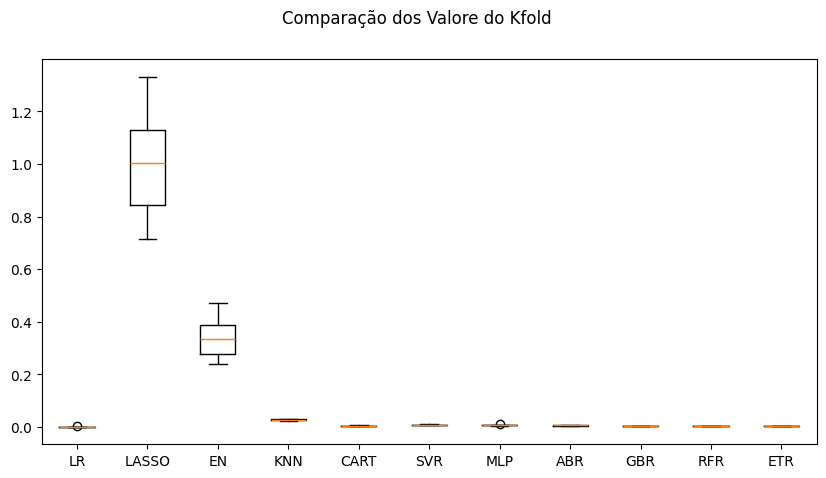

In [18]:
# comparando resultados da validação cruzada
# quanto maior o cross_val_score o modelo é mais consistente e generalizável
fig = pyplot.figure()
fig.suptitle('Comparação dos Valore do Kfold')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(10,5)
pyplot.show()

- Um valor maior de cross_val_score geralmente sugere que o modelo se adapta melhor aos dados e apresenta um desempenho superior na validação cruzada. 
- LASSO E ElasticNet (EN) apresentaram o melhor resultado do kfold, então seriam até agora os escolhidos baseados nessa avaliação.

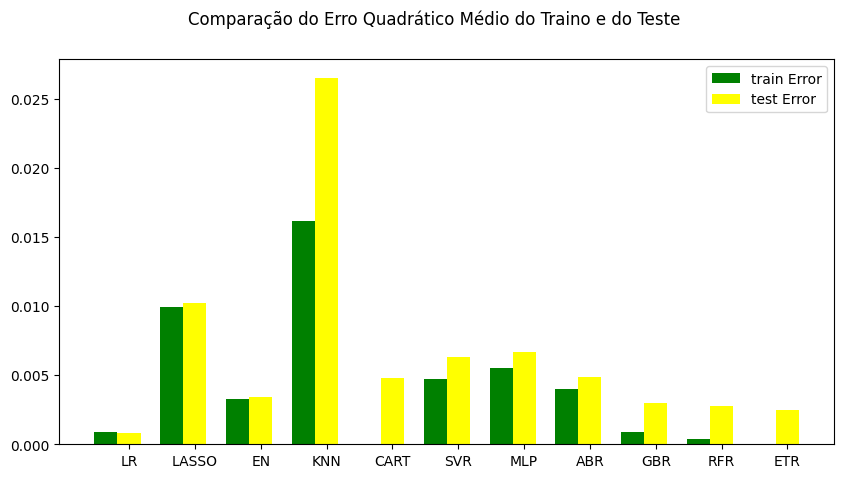

In [19]:
# analisando o erro de treinamento e de teste
# comparando algoritmos
fig = pyplot.figure()

ind = np.arange(len(names)) # as localidades x para os grupos
width = 0.35 # largura das barras

fig.suptitle('Comparação do Erro Quadrático Médio do Traino e do Teste')
ax = fig.add_subplot(111)
pyplot.bar(ind - width, train_results, width=width, label='train Error', color='green')
pyplot.bar(ind, test_results, width=width, label='test Error', color='yellow')
fig.set_size_inches(10,5)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.savefig('grafic_image/compara_erro.png', format='png')
pyplot.show()


- Verificamos que o modelo LR - Linear Regression teve o melhor desempenho relativo ao erro quadrático médio, apresentou o menor erro em conjunto de treino e teste.

- Com exceção do LR os demais modelos apresentaram o erro quadrático médio do teste maior que o erro quadrático médio do treino, o que pode levar a um overfitting, dessa forma elegeremos somente o LR como modelo escolhido dessa comparação mesmo que o seu cross_val_score tenha sido menor que o LASSO e o EN.

In [20]:
# verificando a relação do erro de test sobre o erro de treino
for i in range(10):
    if train_results[i] == 0:
        print('ERRO de teste', names[i], test_results[i])
        print('relação DO ERRO de teste sobre O ERRO de treino', names[i], 0)
    else:
        print('ERRO de teste', names[i], test_results[i])
        print('relação DO ERRO de teste sobre O ERRO de treino', names[i], (test_results[i]/train_results[i]) * 100)

ERRO de teste LR 0.0007900491978517147
relação DO ERRO de teste sobre O ERRO de treino LR 90.52505097709171
ERRO de teste LASSO 0.010250583569510158
relação DO ERRO de teste sobre O ERRO de treino LASSO 103.15241225060534
ERRO de teste EN 0.003444643352475229
relação DO ERRO de teste sobre O ERRO de treino EN 104.0803183264531
ERRO de teste KNN 0.026512634027096593
relação DO ERRO de teste sobre O ERRO de treino KNN 164.48654157562933
ERRO de teste CART 0.004795499373952791
relação DO ERRO de teste sobre O ERRO de treino CART 0
ERRO de teste SVR 0.006332494582653945
relação DO ERRO de teste sobre O ERRO de treino SVR 134.5730693633016
ERRO de teste MLP 0.006683786563206204
relação DO ERRO de teste sobre O ERRO de treino MLP 121.11681283225818
ERRO de teste ABR 0.004879154416582031
relação DO ERRO de teste sobre O ERRO de treino ABR 122.23275024761327
ERRO de teste GBR 0.002972445798669594
relação DO ERRO de teste sobre O ERRO de treino GBR 330.78874605240804
ERRO de teste RFR 0.0027892

- O modelo LR apresentou a melhor relação 90% do erro de teste sobre o erro de treino, sendo o eleito dentre todos os modelos.

- Um valor elevado de Mean Squared Error (MSE) indica que o modelo não está fazendo previsões próximas dos valores reais, sugerindo uma baixa precisão nas suas previsões.

- Quando o erro quadrático médio (MSE) do conjunto de teste é maior que o do conjunto de treinamento, isso pode indicar um problema de overfitting, onde o modelo se ajustou muito bem aos dados de treinamento, mas não generaliza bem para os dados novos.

### Treinando o Modelo ARIMA

In [21]:
# preparando conjunto de dados para modelos ARIMA
# deixando variáveis correlacionadas como variáveis exógenas

X_train_ARIMA = X_train.loc[:, list(X.columns)]
X_test_ARIMA = X_test.loc[:, list(X.columns)]

tr_len = len(X_train_ARIMA)
te_len = len(X_test_ARIMA)
to_len = len(X)

In [22]:
# treinando o modelo ARIMA
warnings.filterwarnings('ignore')
import statsmodels.api as sm

model_arima = sm.tsa.arima.ARIMA(endog= Y_train, exog= X_train_ARIMA, order=[1,0,0])
ARIMAModel = model_arima.fit()

error_training_ARIMA = mean_squared_error(Y_train, ARIMAModel.fittedvalues)
predicated = ARIMAModel.predict(start= tr_len -1, end= to_len -1, exog= X_test_ARIMA)[1:]
error_test_ARIMA = mean_squared_error(Y_test, predicated)

In [23]:
print('error_training_ARIMA', error_training_ARIMA)
print('error_test_ARIMA', error_test_ARIMA)
print('relação DO ERRO de teste sobre O ERRO de treino', (error_test_ARIMA/error_training_ARIMA) * 100)
#print('predicated', predicated.head(5))

error_training_ARIMA 0.0008726845450003024
error_test_ARIMA 0.0007898411540119807
relação DO ERRO de teste sobre O ERRO de treino 90.50706335262383


- O modelo ARIMA também apresentou um erro quadrático médio satisfatório (baixo) tanto para treino quanto para teste, mostrando uma relação de 90% do erro de teste sobre o erro de treino, dessa forma elegeremos este modelo também para ser armazenado e utilizado em predições futuras do preço do ouro.

## Faz o Deploy do Modelo

In [38]:
# faz o deploy do modelo para ser utilizado posteriormente
from joblib import dump

dump(LR_model, 'model/LR_gold_price.pkl')
dump(ARIMAModel, 'model/ARIMA_gold_price.pkl')

['model/ARIMA_gold_price.pkl']